In [1]:
# Import dependencies. 

import pandas as pd
# import requests
# import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Import the API key
# from config_br import geoapify_key

In [2]:
# Read in the sample Miami dataset that includes our API calls for zip codes, school count, hospital count, restaurant count.

miami_all_sample = pd.read_csv("TESTING_Miami_merge.csv")
miami_all_sample.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,47379.1,22018.5,22,0,3,4,33196,2,1,0
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,26516.6,10578.8,21,0,8,4,33138,6,6,10
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,59032.3,3600.5,17,0,6,4,33032,0,0,0
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,47818.3,1899.8,19,0,4,5,33178,2,0,0
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,47633.0,10676.0,21,0,12,4,33162,7,3,0


## Establish bins for school, hospital, and restaurants counts. Add values to new columns.

In [3]:
# Determine max value in each category to determine bin ranges. 

max_school = miami_all_sample["school count"].max()

max_hosp = miami_all_sample["hosp count"].max()

max_rest = miami_all_sample["rest count"].max()

print(f"Max school count: {max_school}")
print(f"Max hospital count: {max_hosp}")
print(f"Max restaurant count: {max_rest}")


Max school count: 21
Max hospital count: 13
Max restaurant count: 25


In [4]:
# Set bins for each category. 

school_bins = [0,1,5,10,25]
school_labels = ["Low","Medium-Low","Medium-High","High"]

hosp_bins = [0,1,5,10,15]
hosp_labels = ["Low","Medium-Low","Medium-High","High"]

rest_bins = [0,3,10,15,26]
rest_labels = ["Low","Medium-Low","Medium-High","High"]

In [5]:
# Use `pd.cut` to categorize schools, hospitals, and restaurants based on the bins.

miami_all_sample["School Count Ranges"] = pd.cut(miami_all_sample["school count"], school_bins, labels=school_labels, include_lowest=True)
miami_all_sample["Hospital Count Ranges"] = pd.cut(miami_all_sample["hosp count"], hosp_bins, labels=hosp_labels, include_lowest=True)
miami_all_sample["Restaurant Count Ranges"] = pd.cut(miami_all_sample["rest count"], hosp_bins, labels=hosp_labels, include_lowest=True)

miami_all_sample

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count,School Count Ranges,Hospital Count Ranges,Restaurant Count Ranges
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,0,3,4,33196,2,1,0,Medium-Low,Low,Low
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,0,8,4,33138,6,6,10,Medium-High,Medium-High,Medium-High
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,0,6,4,33032,0,0,0,Low,Low,Low
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,0,4,5,33178,2,0,0,Medium-Low,Low,Low
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,0,12,4,33162,7,3,0,Medium-High,Medium-Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25.472525,-80.433248,1079160050470,205000.0,6000,2099,552,15030.6,30519.2,19206.7,...,0,7,2,33033,0,2,1,Low,Medium-Low,Low
946,25.930984,-80.241814,3421100111170,190000.0,7500,1420,4216,7027.0,39768.1,715.2,...,0,9,4,33056,7,1,0,Medium-High,Low,Low
947,25.558126,-80.345804,3660160150250,364000.0,5250,2789,40975,11205.0,10543.6,2541.1,...,0,1,2,33190,0,1,0,Low,Low,Low
948,25.519528,-80.391422,3069360010840,165000.0,8183,1325,3192,18706.1,18337.1,14220.9,...,0,11,2,0,1,0,0,Low,Low,Low


## School density analysis

In [8]:
# Group the data by the school count bins to find the median home sale price for each bin. 

school_med_price = miami_all_sample.groupby("School Count Ranges").median()["SALE_PRC"]
school_med_price

School Count Ranges
Low            335000.0
Medium-Low     313250.0
Medium-High    289900.0
High           191500.0
Name: SALE_PRC, dtype: float64

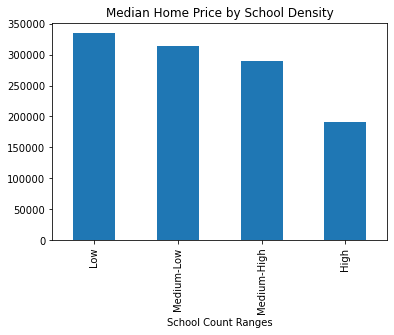

In [9]:
# Create a bar chart to show median home price for each school density group. 

school_med_price.plot(kind="bar", title="Median Home Price by School Density")

In [10]:
# Group the data by school density bins to find the number of homes sold within each bin. 

school_sale_count = miami_all_sample.groupby("School Count Ranges").count()["SALE_PRC"]
school_sale_count

School Count Ranges
Low            235
Medium-Low     432
Medium-High    229
High            54
Name: SALE_PRC, dtype: int64

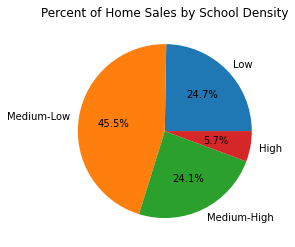

In [12]:
# Create a pie chart to show percent of homes sold in each school density grouping. 

school_sale_count.plot(kind="pie",y="School Density",title="Percent of Home Sales by School Density",autopct='%1.1f%%').set_ylabel("")
plt.savefig("pie_test.png")


## Restaurant density analysis 

In [13]:
# Group the data by the restaurant count bins to find the median home sale price for each bin. 

rest_med_price = miami_all_sample.groupby("Restaurant Count Ranges").median()["SALE_PRC"]
rest_med_price

Restaurant Count Ranges
Low            292000.0
Medium-Low     362000.0
Medium-High    337500.0
High           421000.0
Name: SALE_PRC, dtype: float64

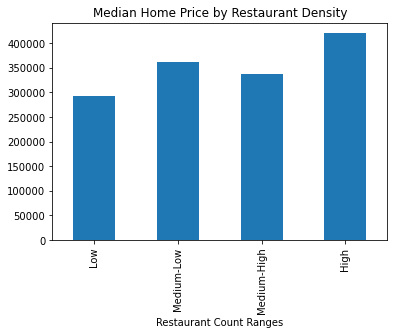

In [14]:
# Create a bar chart to show median home price for each restaurant density group. 

rest_med_price.plot(kind="bar", title="Median Home Price by Restaurant Density")

In [15]:
# Group the data by restaurant density bins to find the number of homes sold within each bin. 

rest_sale_count = miami_all_sample.groupby("Restaurant Count Ranges").count()["SALE_PRC"]
rest_sale_count

Restaurant Count Ranges
Low            667
Medium-Low     202
Medium-High     50
High            13
Name: SALE_PRC, dtype: int64

Text(0, 0.5, '')

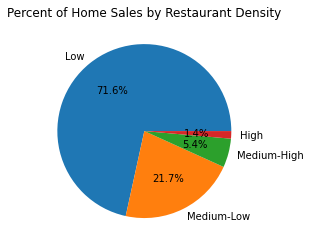

In [16]:
# Create a pie chart to show percent of homes sold in each restaurant density grouping. 

rest_sale_count.plot(kind="pie",y="Restaurant Density",title="Percent of Home Sales by Restaurant Density",autopct='%1.1f%%').set_ylabel("")

In [17]:
# Let's try grouping the data by restaurant density bins to find the total of home sales for each bin. 

rest_sales_total = miami_all_sample.groupby("Restaurant Count Ranges").sum()["SALE_PRC"]
rest_sales_total

Restaurant Count Ranges
Low            243462000.0
Medium-Low      95397400.0
Medium-High     20566700.0
High             5750500.0
Name: SALE_PRC, dtype: float64

Text(0, 0.5, '')

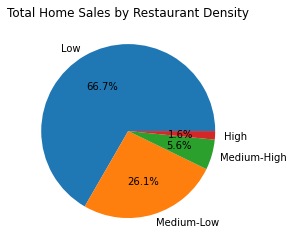

In [19]:
# Create a pie chart to show total sales in each restaurant density grouping. 

rest_sales_total.plot(kind="pie",y="Restaurant Density",title="Total Home Sales by Restaurant Density",autopct='%1.1f%%').set_ylabel("")